# Introduction
## Problem statement 
The problem statement involves BoomBikes, a US-based bike-sharing provider, facing revenue challenges due to the COVID-19 pandemic. To overcome this setback, the company aims to devise a strategic business plan to boost revenue once the lockdown restrictions ease and the economy recovers. Specifically, BoomBikes wants to comprehend the post-quarantine demand for shared bikes in the American market to position itself favorably amidst competitors and generate substantial profits.

To achieve this goal, BoomBikes has engaged a consulting firm to analyze the factors influencing the demand for shared bikes. The key objectives are:

1. Identifying significant variables that play a pivotal role in predicting the demand for shared bikes.
2. Evaluating the effectiveness of these variables in accurately describing the fluctuations in bike demands.

## Business goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import itertools
%matplotlib inline

In [2]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [4]:
df= pd.read_csv('data/day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


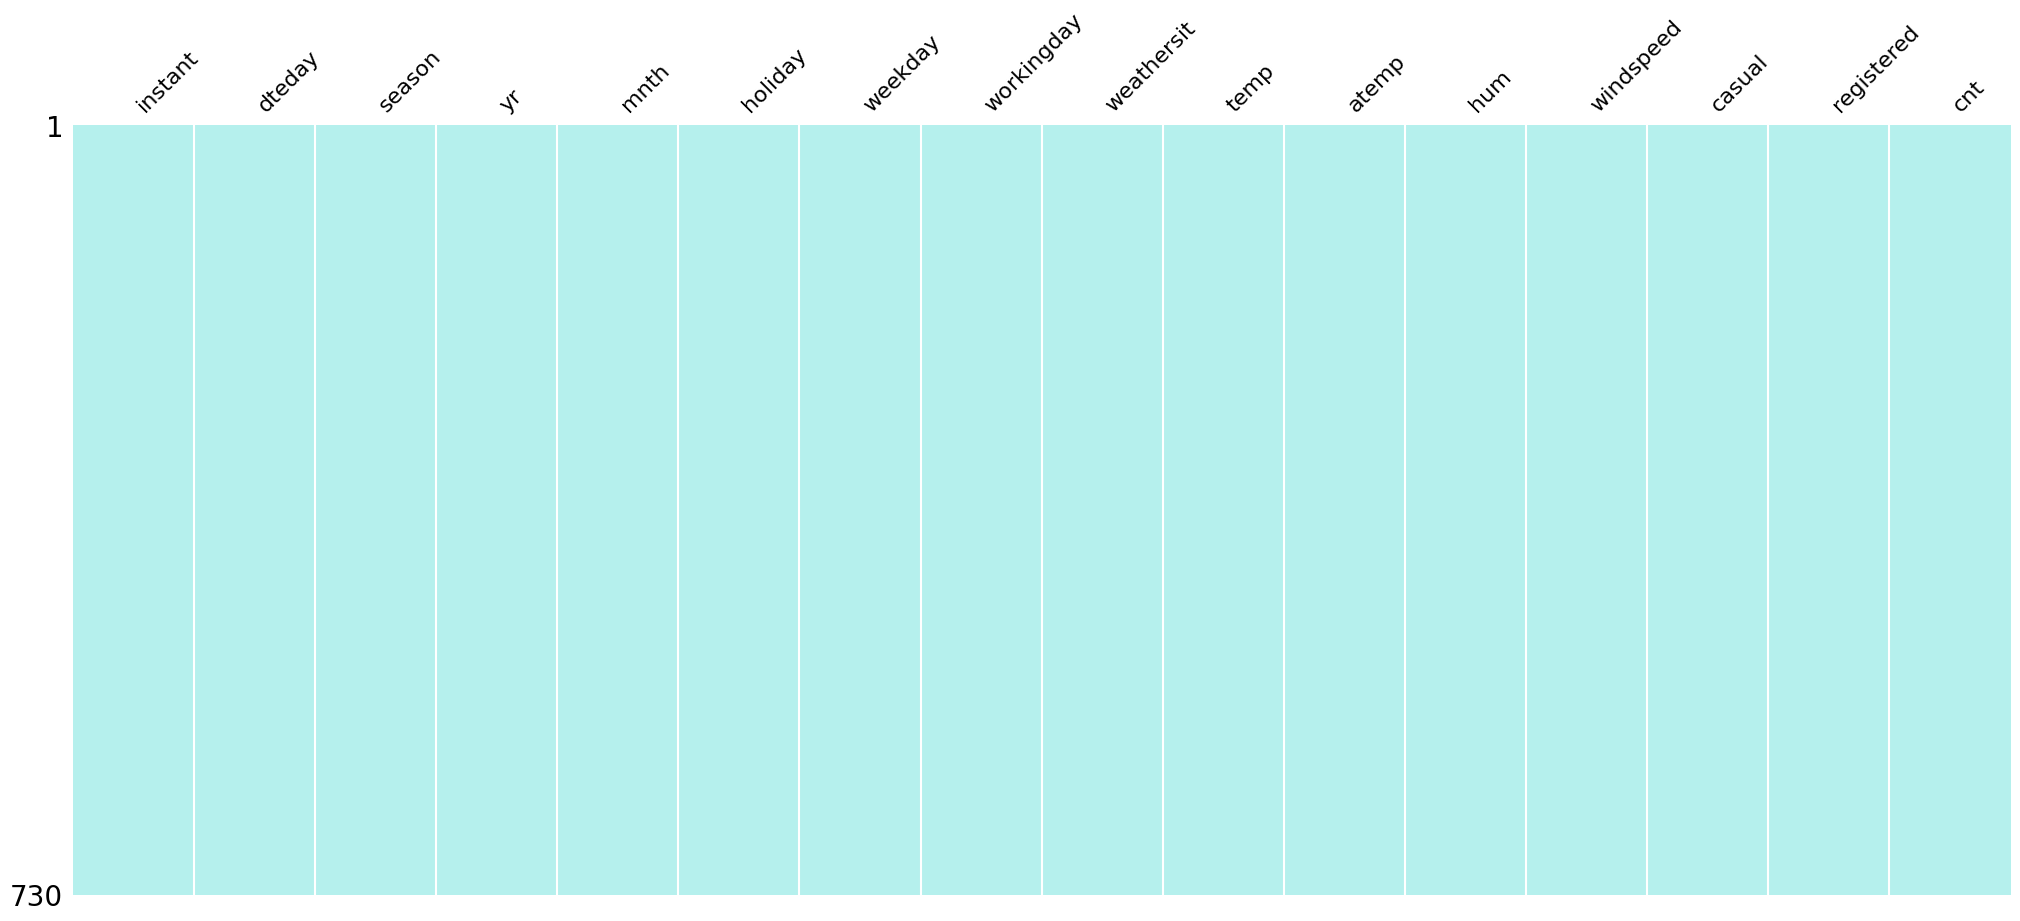

In [7]:
#overview missing data
fig = msno.matrix(df,sparkline=False,
                      color=( 181/255, 240/255, 237/255 ))
plt.show()

> have no missing data

In [8]:
# Check duplicate
bike_dup=df
bike_dup.drop_duplicates(subset=None, inplace=True)
if bike_dup.shape == df.shape :
    print('There have no duplicate')
else:
    print('Some duplicates in dataset')

There have no duplicate


In [9]:
# check columns with only one values
columns  = list(df.columns)
columns_vales_count = {c : len(df[c].value_counts().index) for c in columns}
one_value_column = [c for c,v in columns_vales_count.items() if v <2 ]
if len(one_value_column) > 0:
    print(f'Columns have only one value: {one_value_column}')
else:
    print('There is no column with only one values')

There is no column with only one values


In [10]:
#rename the columns
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace =True)

In [11]:
# numerical columns and categorical columns
num_cols = ['temp', 'atemp', 'humidity', 'windspeed','casual', 'registered', 'count']
cat_col = ['year', 'holiday', 'workingday', 'month', 'weathersit', 'season', 'weekday']

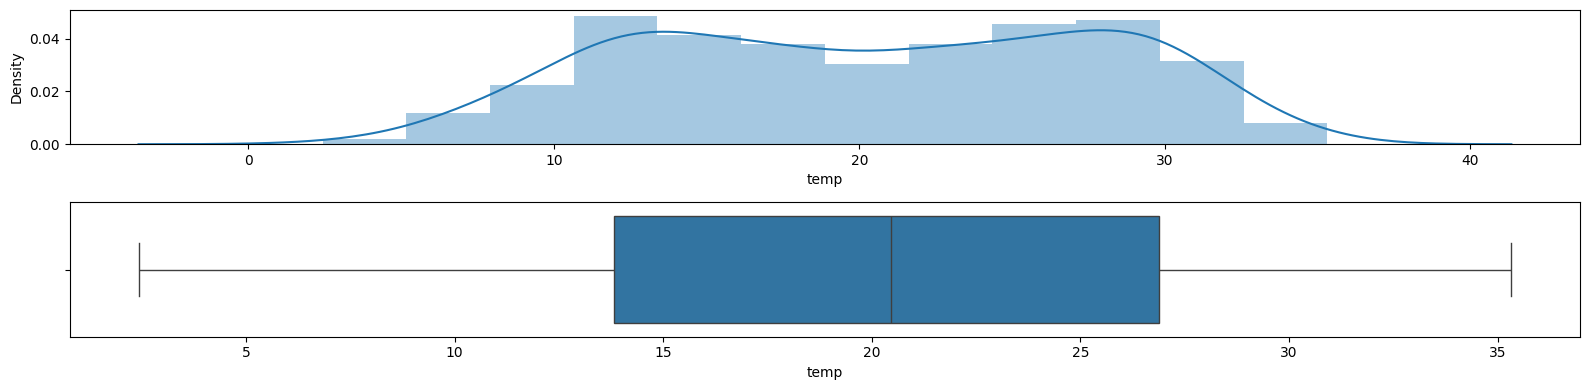

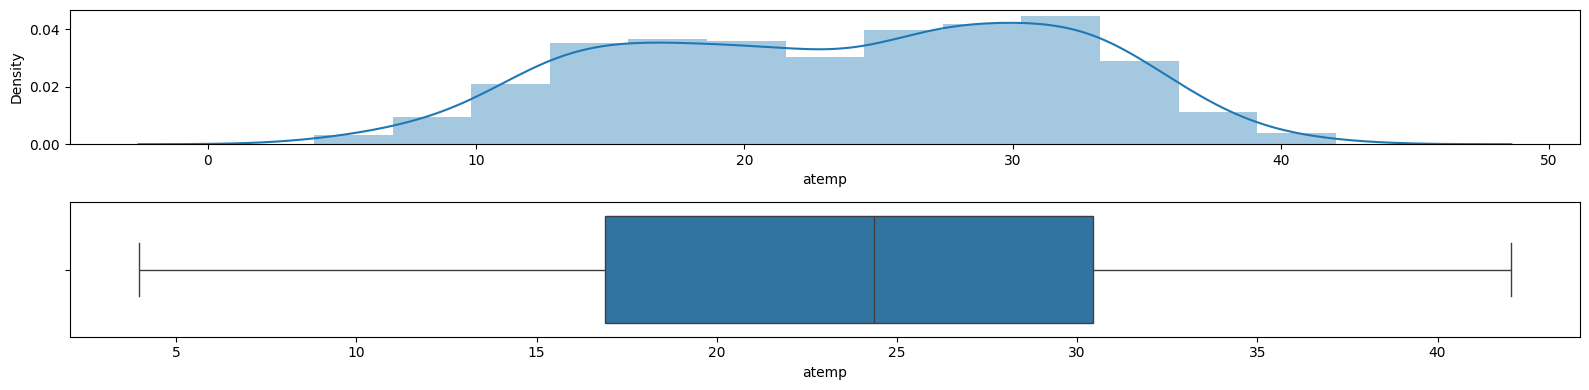

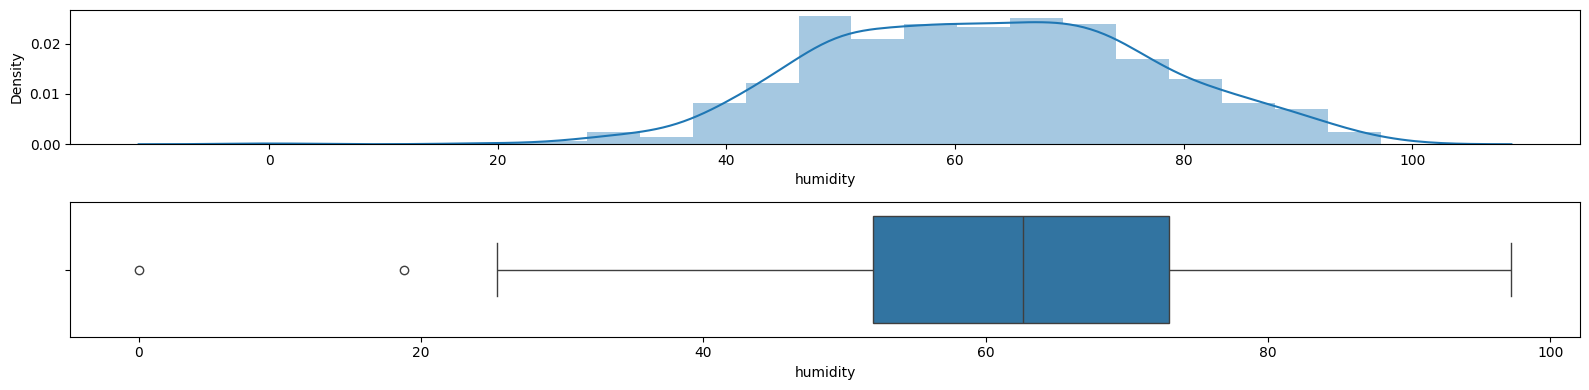

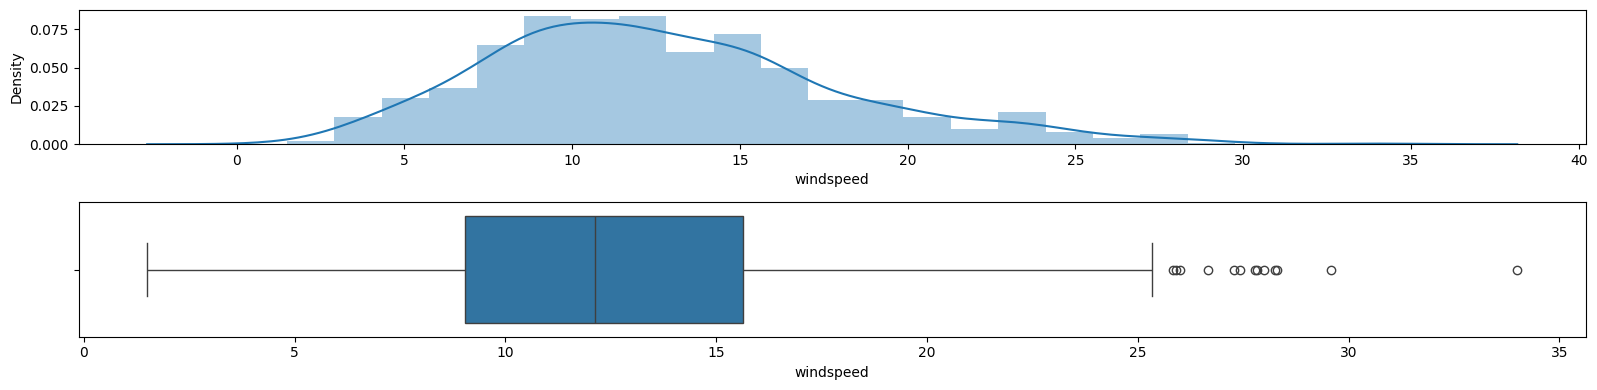

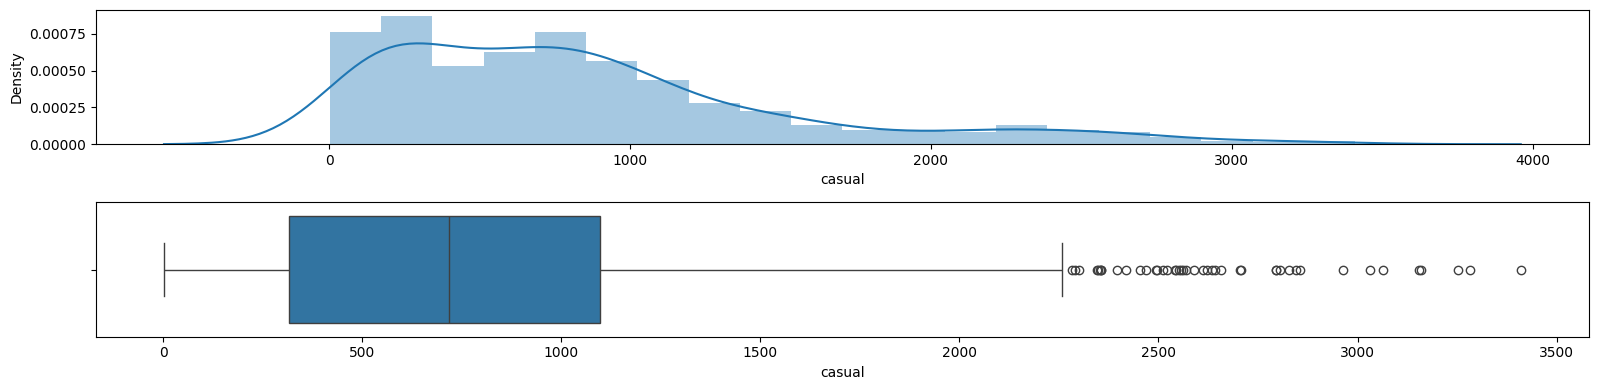

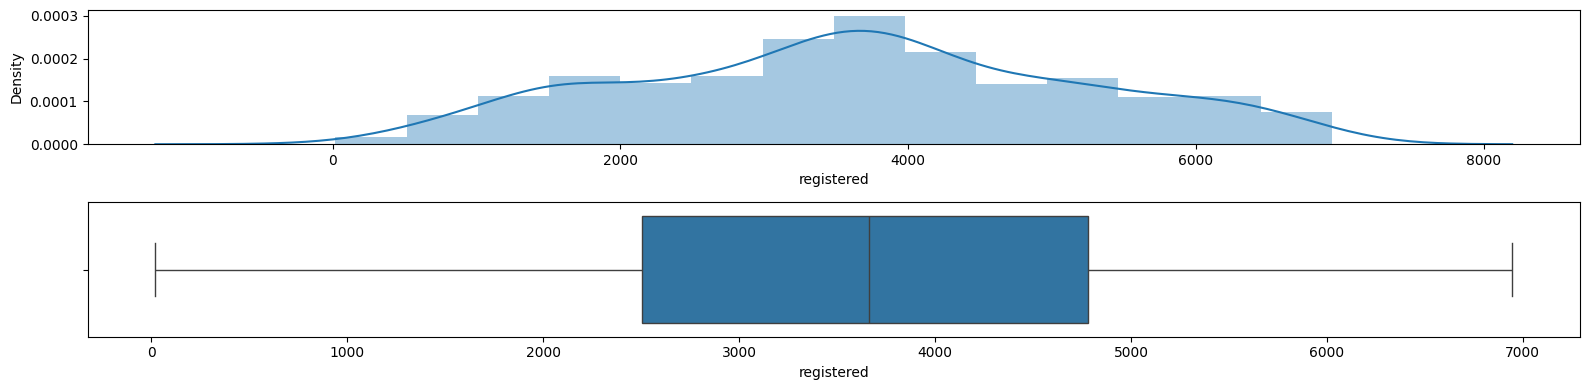

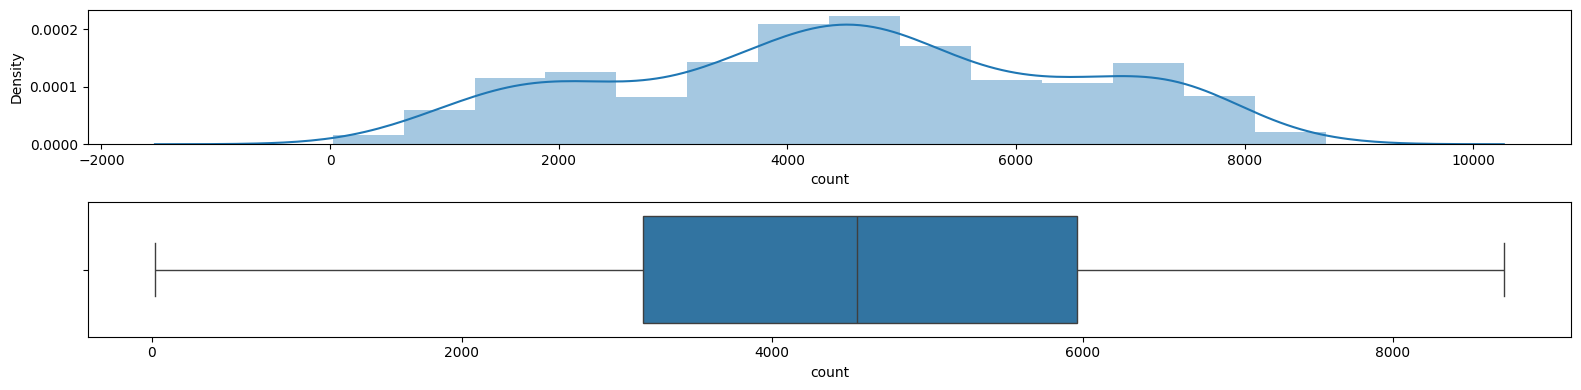

In [12]:
# indentify outliers
def univariate_analysis1(df, column):
    _, p = plt.subplots(2,1, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(f'{column}')
    p[1].set_xlabel(f'{column}')
    plt.tight_layout()
    plt.show()
for c in num_cols:
    univariate_analysis1(df, c)

> Some outlier from casual column

# Data cleaning

In [13]:
# drop useless columns:
# instant jusst represent the index
# dteday is described by year, month, weekday
df = df.drop(columns=['instant','dteday'])
df.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [14]:
# def drop_outliner(df, col):
#     old_rows = len(df)
#     q25 = df[col].quantile(0.25)
#     q75 = df[col].quantile(0.75)
#     iqr = q75 - q25
#     upper = q75 + 1.5 * iqr
#     new_df = df[df[col] < upper]
#     new_rows = len(new_df)
#     print('Percentage of dropped row: ', round((old_rows - new_rows)/old_rows*100,2), "%")
#     return new_df
# df= drop_outliner(df,'casual')

# EDA

In [15]:
df.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [16]:
#mapping the vars - season,month,weathersit,weekday
df_eda = df.copy()
df_eda['season']=df_eda.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
df_eda['month']=df_eda.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_eda['weathersit']=df_eda.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df_eda['weekday']=df_eda.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df_eda['year'] = df_eda.year.map({0:'2018', 1:'2019'})
df_eda['holiday'] = df_eda.holiday.map({0:'non_holiday', 1:'holiday'})
df_eda['workingday'] = df_eda.workingday.map({0:'non_workingday', 1:'workingday'})


df_eda.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,spring,2018,Jan,non_holiday,Sat,non_workingday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,non_holiday,Sun,non_workingday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,non_holiday,Mon,workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,non_holiday,Tue,workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,non_holiday,Wed,workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Figure size 1500x3000 with 0 Axes>

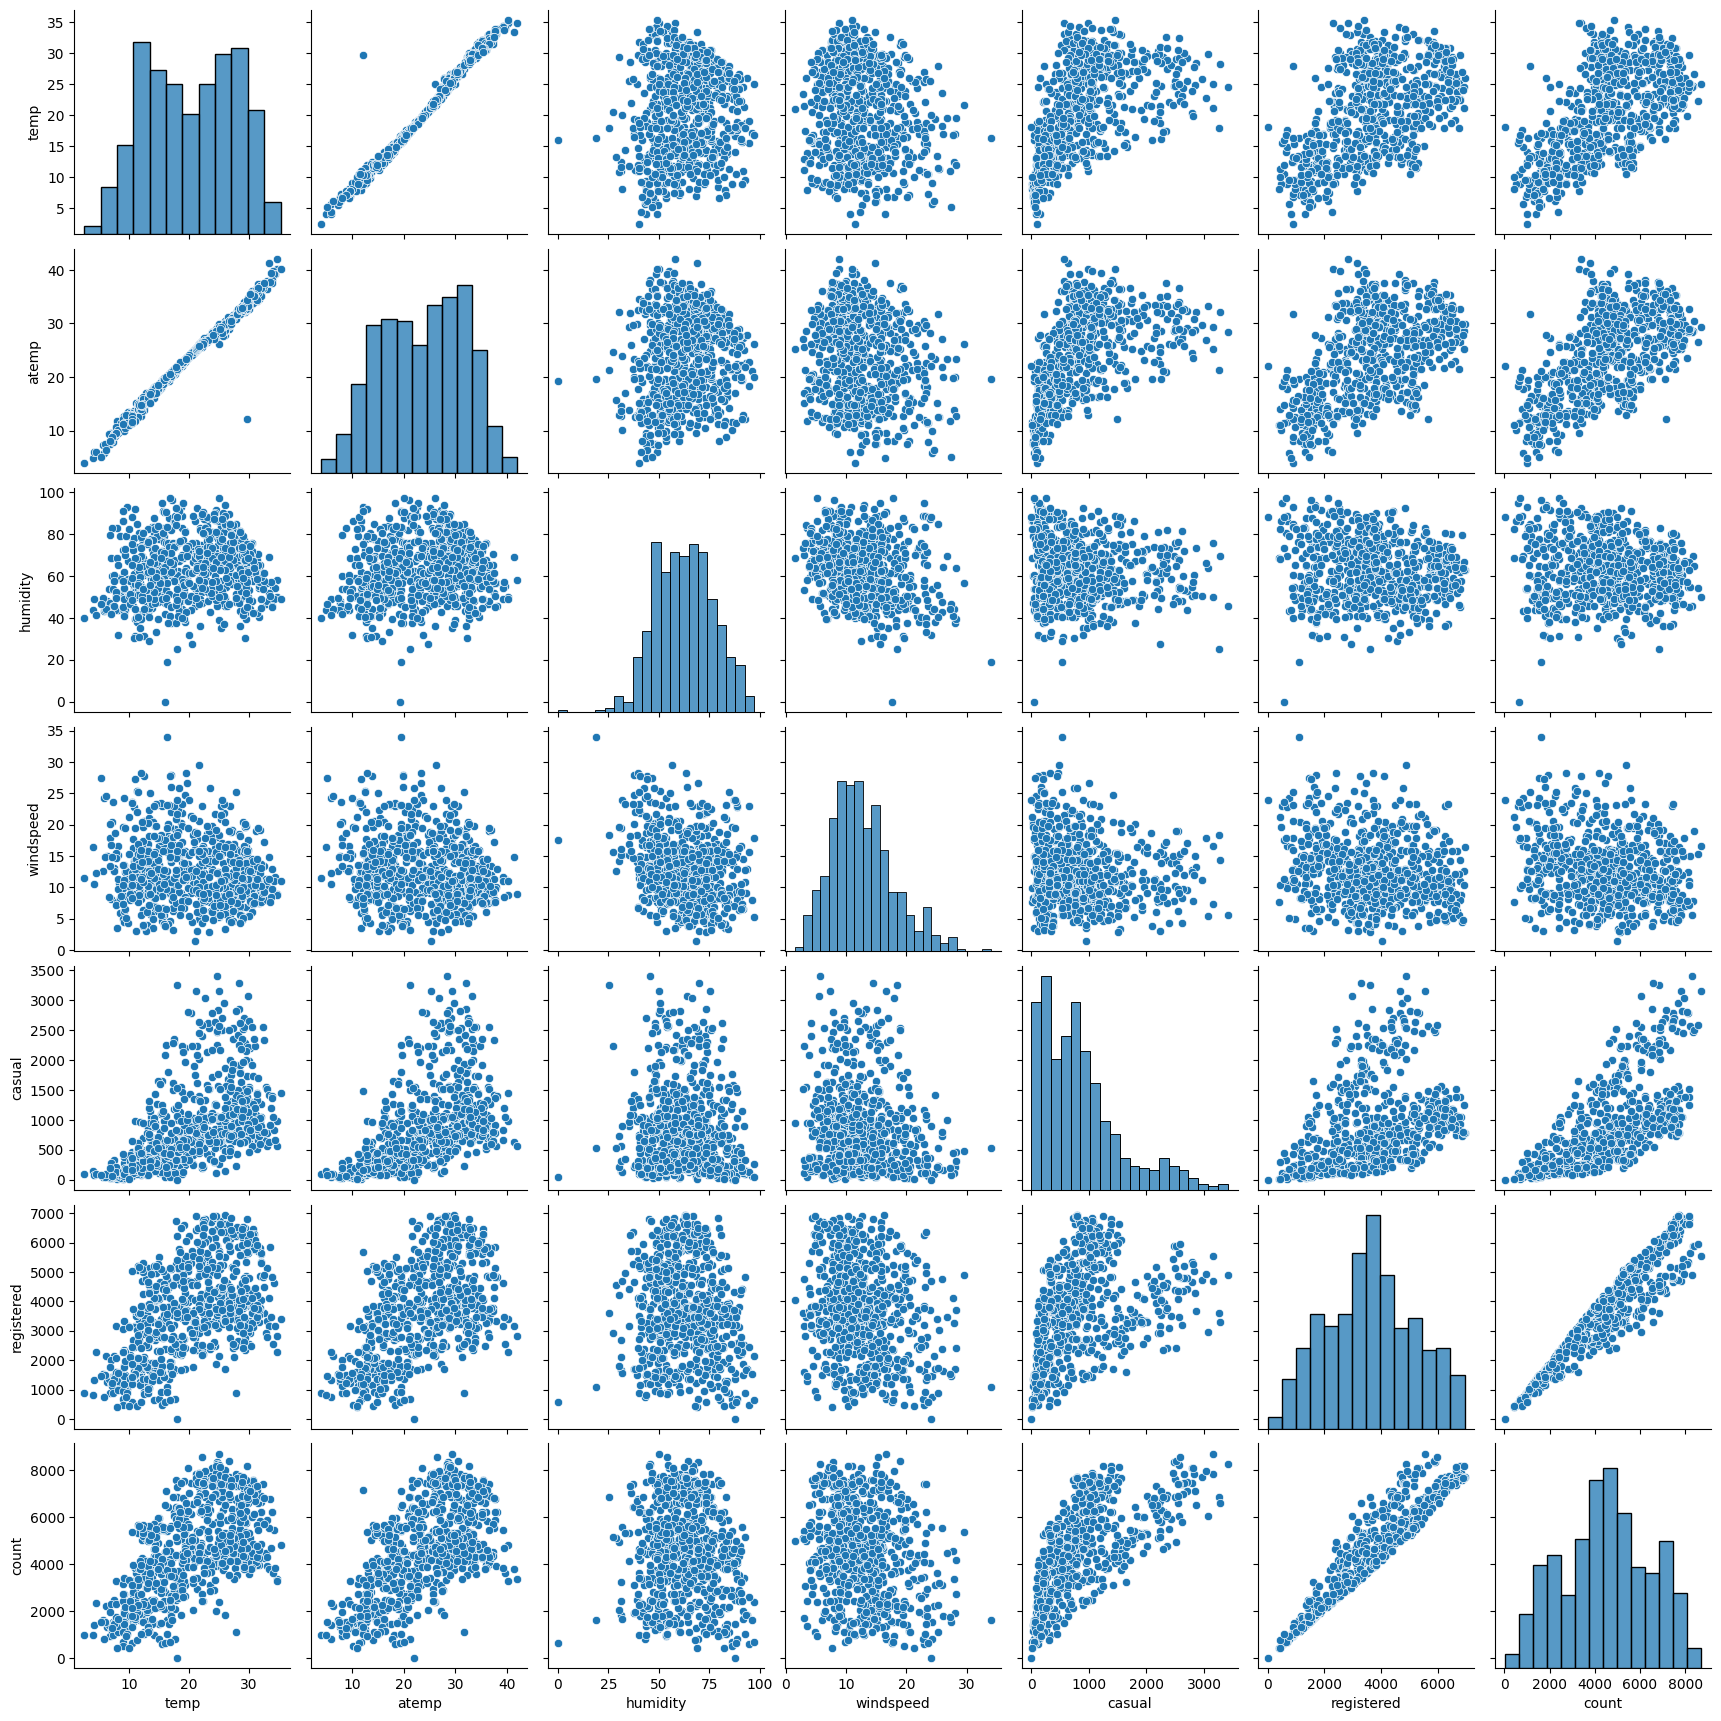

In [17]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df_eda,vars=num_cols)
plt.show()

> 1. Total count of the bikes are corelated to Temperature
> 2. Total count is not influenced with Windspeed,humidity

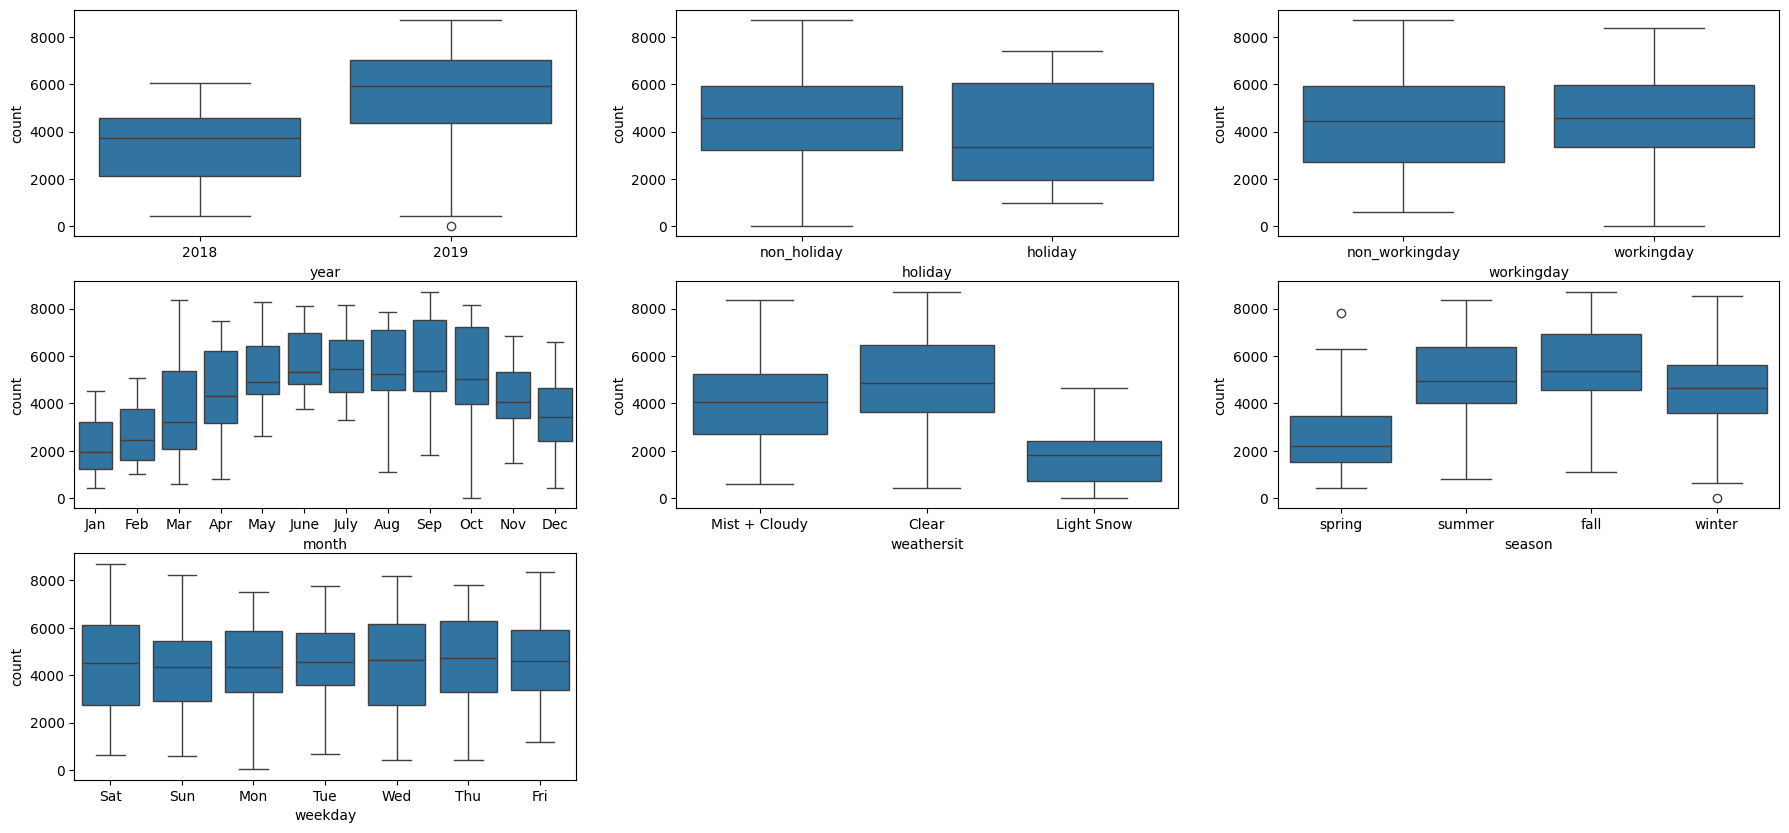

In [19]:
# scatter plot for categorical vars
plt.figure(figsize=(22, 10))
for i,col_name in enumerate(cat_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col_name, y = 'count', data = df_eda)
plt.show()

1. More bike rentals in 2019
2. Less bike rentals in hoiday than non-holidays
3. More bike rentals in woking day
4. Peaked on Sep
5. More rentals on Clear weather
6. More rentals on fall
7. Less rentals on Sunday

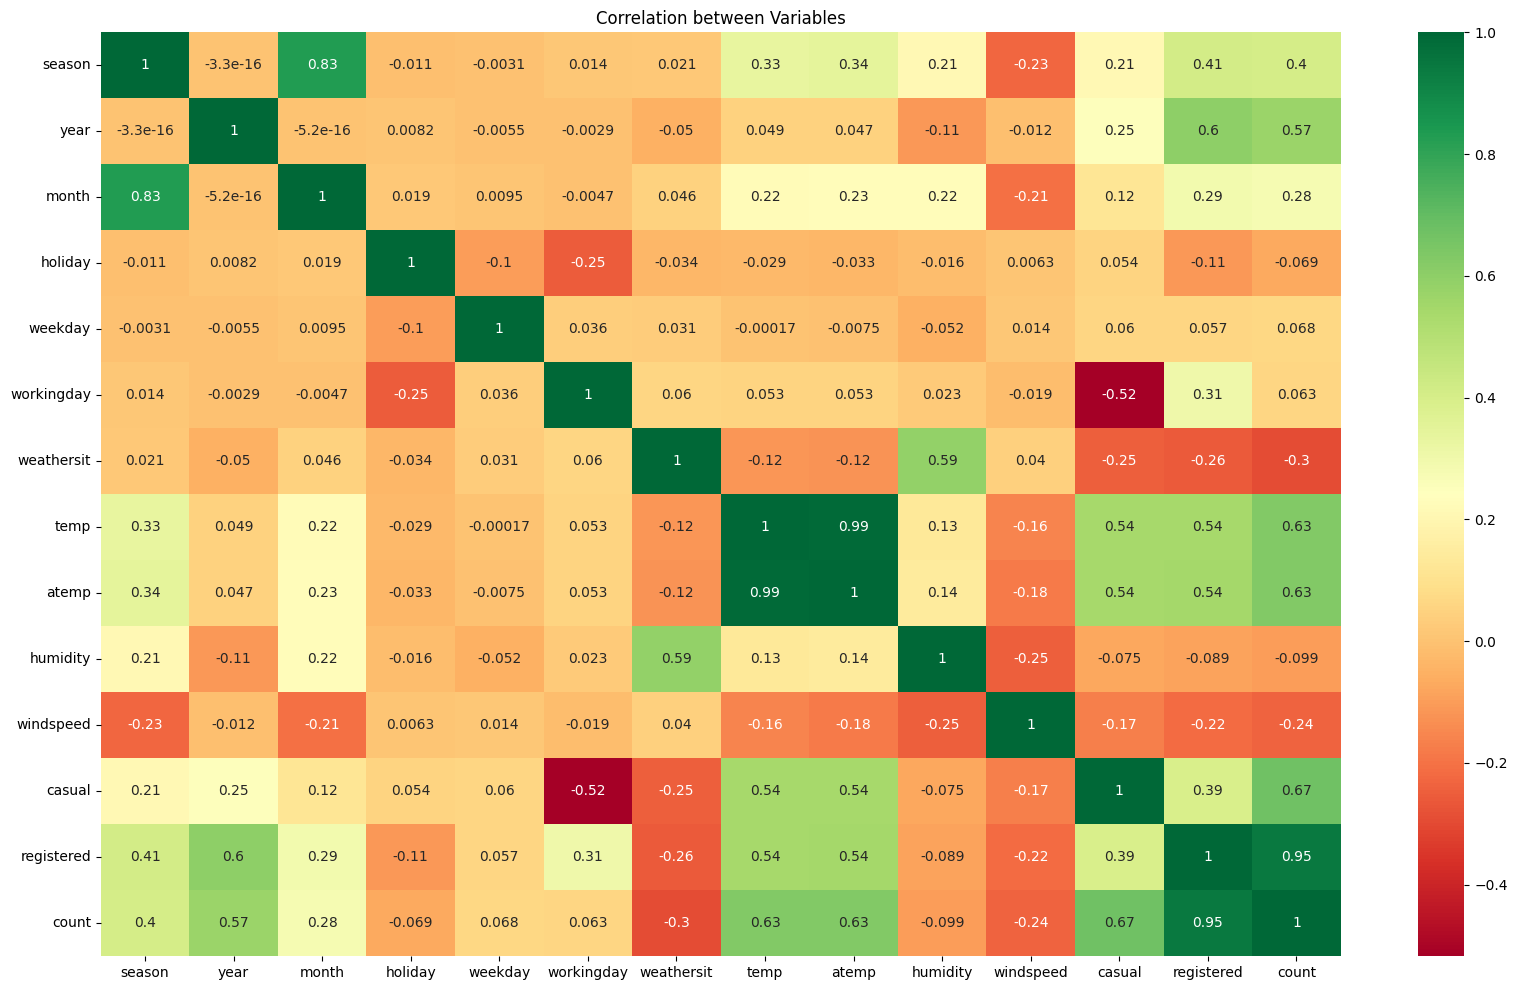

In [22]:
#Heatmap to see correlation between variables
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

> The total count exhibits the strongest correlation with registrations.

> 

# Data preparing